<a href="https://colab.research.google.com/github/varshini123-a/Capstone/blob/main/un1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the dataset
import pandas as pd 
dataset = pd.read_csv('train_ugam.csv')
dataset.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
dataset.columns

Index(['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

In [ ]:
print("Number of rows in data =",dataset.shape[0])
print("Number of columns in data =",dataset.shape[1])
print("\n")

Number of rows in data = 6136
Number of columns in data = 14




In [ ]:
def gen_freq(Review):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in Review.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.Review.str)

the             7983
to              5947
and             5406
I               4700
a               4246
                ... 
Severe             1
4K.                1
irregularity       1
Whatever           1
e                  1
Length: 15854, dtype: int64

In [ ]:
word_freq=gen_freq(dataset.Review.str)
print(word_freq)

the             7983
to              5947
and             5406
I               4700
a               4246
                ... 
Severe             1
4K.                1
irregularity       1
Whatever           1
e                  1
Length: 15854, dtype: int64


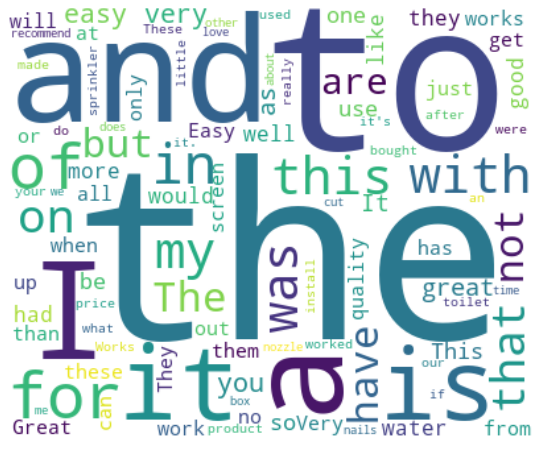

In [ ]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**`  DATA PREPROCESSING`**

In [ ]:
import re

#Clean text from noise
def clean_text(Review):
    #Filter to allow only alphabets
    Review = re.sub(r'[^a-zA-Z\']', ' ', Review)
    
    #Remove Unicode characters
    Review = re.sub(r'[^\x00-\x7F]+', '', Review)
    
    #Remove punctuations
    Review = re.sub(r'[?!.;:,#@-]', '', Review)
    
    #Convert to lowercase to maintain consistency
    Review = Review.lower()
       
    return Review

In [ ]:
dataset['clean_text'] = dataset.Review.apply(lambda x: clean_text(x))

In [ ]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'above', 'there', 'be', 'does', 'it', 'in', "she'd", 'you', 'any', 'doing', 'because', 'what', 'against', 'such', 'both', 'had', 'an', "they'll", "we're", 'this', "what's", 'can', 'their', 'each', 'on', 'have', "didn't", "you're", "i've", 'so', 'him', 'under', "hadn't", 'while', "how's", "they're", 'a', 'over', 'for', 'most', 'again', 'of', 'com', 'am', 'by', 'our', "weren't", 'with', 'me', 'her', "they've", 'only', 'during', "couldn't", "he's", 'who', 'would', 'them', 'however', 'its', 'www', 'about', 'that', 'theirs', "let's", "it's", "isn't", "she'll", 'my', 'ever', 'otherwise', "won't", 'out', 'why', 'she', 'could', "i'd", "hasn't", "wasn't", 'or', 'they', 'i', 'between', "where's", 'more', "mustn't", 'yours', 'very', "he'll", 'herself', 'from', "you'd", 'r', "haven't", 'itself', "you'll", 'further', "we'll", "who's", 'these', 'into', "that's", 'other', "she's", 'after', 'http', 'ourselves', 'own', 'here', "shan't", 'having', "here's", 'than', 'ours', 'like', 'then', 'but', 'befor

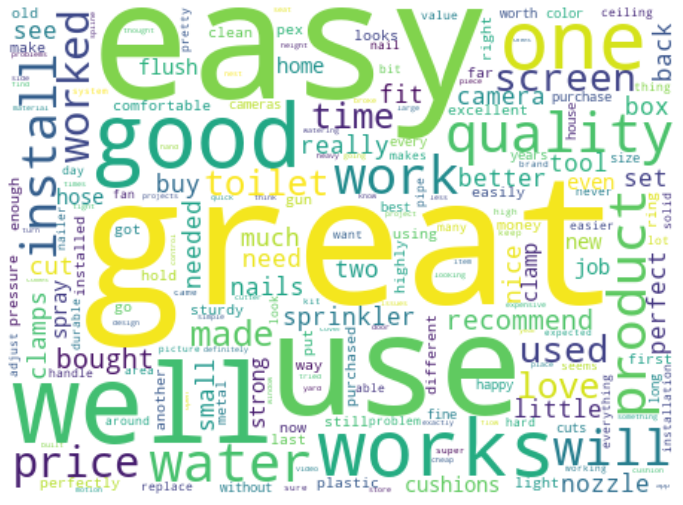

In [ ]:
Review = dataset.Review.apply(lambda x: clean_text(x))
word_freq = gen_freq(Review.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0

#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
    else:
        return 0

In [ ]:
word_freq = gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100 = word_freq[-100:]
#Number of words in a tweet
dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))

In [ ]:
gen_freq(dataset.clean_text.str)[:10]

the     9333
to      6030
and     5526
i       4922
a       4369
it      4190
is      2677
for     2602
of      2354
this    2314
dtype: int64